<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/AD03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.1 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=28c3ddd58e85516f083ec69ac9bed70e4fcb4c0de691780ffade650ce3a5fe08
  Stored in directory: /root/.cache/pip/wheels/3d/48/a8/87d61660791c7e6b0f5c3068da7fb17ade7fdc041e864fe053
Successfully built pyod


/usr/local/lib/python3.7/dist-packages/pyod/models/base.py:413: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")



On Training Data:
CD ROC:0.9631, precision @ rank n:0.85

On Test Data:
CD ROC:0.9011, precision @ rank n:0.8


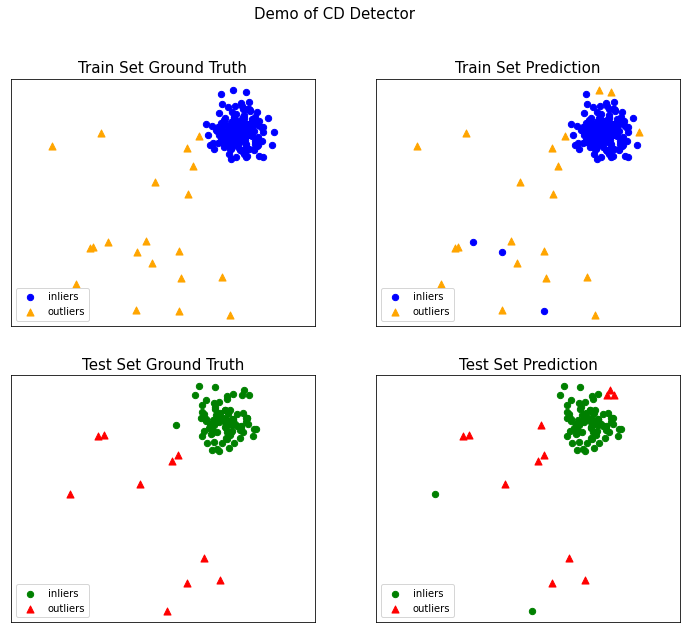

In [2]:
import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from pyod.models.cd import CD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train HBOS detector
    clf_name = 'CD'
    clf = CD()
    clf.fit(X_train, y_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(np.append(X_test, y_test.reshape(-1,1), axis=1))  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(np.append(X_test, y_test.reshape(-1,1), axis=1))  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)